In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Simulate data for 100,000 players
np.random.seed(42)
n_players = 100000
price = np.random.choice(['Alto', 'Medio', 'Bajo'], size=n_players, p=[0.17, 0.33, 0.5])
platform = np.random.choice(['PC', 'Consola'], size=n_players, p=[0.70, 0.30])
friends = np.random.choice(['Sí', 'No'], size=n_players, p=[0.65, 0.35])
purchase = np.zeros(n_players)

In [5]:
# Assign probabilities
for i in range(n_players):

    # ===== PRECIO ALTO =====
    if price[i] == 'Alto' and platform[i] == 'PC' and friends[i] == 'Sí':
        purchase[i] = np.random.choice([1, 0], p=[0.07, 0.93])
    elif price[i] == 'Alto' and platform[i] == 'PC' and friends[i] == 'No':
        purchase[i] = np.random.choice([1, 0], p=[0.04, 0.96])

    elif price[i] == 'Alto' and platform[i] == 'Consola' and friends[i] == 'Sí':
        purchase[i] = np.random.choice([1, 0], p=[0.04, 0.96])
    elif price[i] == 'Alto' and platform[i] == 'Consola' and friends[i] == 'No':
        purchase[i] = np.random.choice([1, 0], p=[0.02, 0.98])

    # ===== PRECIO MEDIO =====
    elif price[i] == 'Medio' and platform[i] == 'PC' and friends[i] == 'Sí':
        purchase[i] = np.random.choice([1, 0], p=[0.16, 0.84])
    elif price[i] == 'Medio' and platform[i] == 'PC' and friends[i] == 'No':
        purchase[i] = np.random.choice([1, 0], p=[0.09, 0.91])

    elif price[i] == 'Medio' and platform[i] == 'Consola' and friends[i] == 'Sí':
        purchase[i] = np.random.choice([1, 0], p=[0.10, 0.90])
    elif price[i] == 'Medio' and platform[i] == 'Consola' and friends[i] == 'No':
        purchase[i] = np.random.choice([1, 0], p=[0.06, 0.94])

    # ===== PRECIO BAJO =====
    elif price[i] == 'Bajo' and platform[i] == 'PC' and friends[i] == 'Sí':
        purchase[i] = np.random.choice([1, 0], p=[0.28, 0.72])
    elif price[i] == 'Bajo' and platform[i] == 'PC' and friends[i] == 'No':
        purchase[i] = np.random.choice([1, 0], p=[0.15, 0.85])

    elif price[i] == 'Bajo' and platform[i] == 'Consola' and friends[i] == 'Sí':
        purchase[i] = np.random.choice([1, 0], p=[0.18, 0.82])
    elif price[i] == 'Bajo' and platform[i] == 'Consola' and friends[i] == 'No':
        purchase[i] = np.random.choice([1, 0], p=[0.10, 0.90])

    else:
        purchase[i] = np.random.choice([1, 0], p=[0.001, 0.999])


In [6]:
# Create a DataFrame
data = pd.DataFrame({'Precio': price, 'Plataforma': platform, 'Amigos': friends, 'Compra': purchase})

In [7]:
# Calculate conditional probabilities
prob_purchase = data.groupby(['Precio', 'Plataforma', 'Amigos'])['Compra'].mean().reset_index()

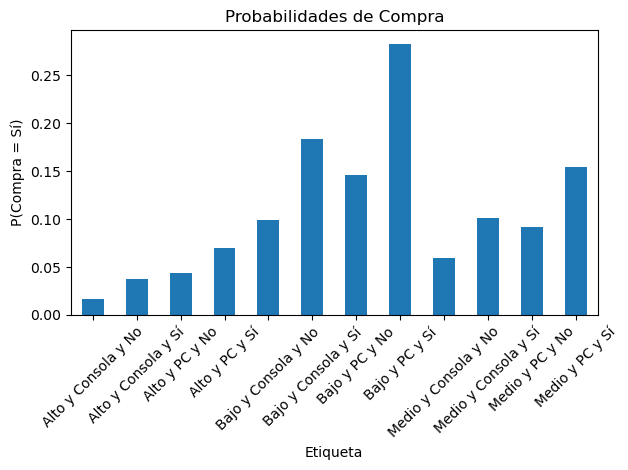

In [9]:
# Combine 'Contaminación' and 'Fumador' into a single label for the x-axis
prob_purchase['Etiqueta'] = prob_purchase['Precio'] + ' y ' + prob_purchase['Plataforma'] + ' y ' + prob_purchase['Amigos']

# Plot the probabilities
fig, ax = plt.subplots()
prob_purchase.plot(kind='bar', x='Etiqueta', y='Compra', ax=ax, legend=False)
ax.set_ylabel('P(Compra = Sí)')
ax.set_title('Probabilidades de Compra')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('probabilidades_compra_videojuegos.png') 
plt.show()